In [1]:
# Initialization
import matplotlib.pyplot as plt
import numpy as np

# Importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# Import basic plot tools
from qiskit.visualization import plot_histogram

In [2]:
l = [1,5,7,10]

In [3]:
# Writing the integrers in binary representation

def int_to_bit(l):
    p = []
    for i in l:
        p.append(bin(i)[2:].zfill(4))
    return p

list_bit = int_to_bit(l)

print(list_bit)  

N = len(list_bit)

['0001', '0101', '0111', '1010']


In [4]:
# Finding integers whose binary representation is such that two adjacent bits are different

def ind_sol(l, N):
    p = []
    for i in range (len(l)):
        s = 0
        for k in range (len(l[0])-1):
            if l[i][k] != l[i][k+1]: 
                s+=1
        if s == N-1:
            p.append(i)
    return p

list_ind_sol = ind_sol(list_bit, N)

print(list_ind_sol)

[1, 3]


In [5]:
# Writing the indices of the integrers in binary representation

list_ind = [i for i in range(N)]

def ind_to_bit(l):
    p = []
    for i in l:
        p.append(bin(i)[2:].zfill(2))
    return p

list_ind_bit = ind_to_bit(list_ind)

print(list_ind_bit)

['00', '01', '10', '11']


We apply Grover's algorithm to create a quantum state which is a superposition of indices of the target solution :



In [6]:
# Initialising by applying a H-gate to 'qubits' in qc

def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

In [7]:
# Creating a phase oracle

qc = QuantumCircuit(2)
qc.z(1)
oracle = qc.to_gate()
oracle.name = "U$_\omega$"

In [9]:
# Diffusion operator (U_s)

def diffuser2(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h([0,1])
    qc.z([0,1])
    qc.cz(0,1)
    qc.h([0,1])
    U_s = qc.to_gate()
    U_s.name = "U$_s$"
    return U_s

In [40]:
n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.append(oracle, [0,1])
grover_circuit.append(diffuser2(n), [0,1])
grover_circuit.measure_all()
grover_circuit.draw()

┌───┐┌─────────────┐┌────────┐ ░ ┌─┐   
   q_0: ┤ H ├┤0            ├┤0       ├─░─┤M├───
        ├───┤│  U$_\omega$ ││  U$_s$ │ ░ └╥┘┌─┐
   q_1: ┤ H ├┤1            ├┤1       ├─░──╫─┤M├
        └───┘└─────────────┘└────────┘ ░  ║ └╥┘
meas: 2/══════════════════════════════════╩══╩═
                                          0  1

In [51]:
n = 2
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.z(1)
grover_circuit.x(0)
grover_circuit.barrier()

grover_circuit.h([0,1])
grover_circuit.x([0,1])
grover_circuit.cz(0,1)
grover_circuit.x([0,1])
grover_circuit.h([0,1])

grover_circuit.draw()

┌───┐┌───┐ ░ ┌───┐┌───┐   ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├
     ├───┤├───┤ ░ ├───┤├───┤ │ ├───┤├───┤
q_1: ┤ H ├┤ Z ├─░─┤ H ├┤ X ├─■─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘   └───┘└───┘

In [52]:
sim = Aer.get_backend('aer_simulator')
# Make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator
grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
qobj = assemble(grover_circuit_sim)
result = sim.run(qobj).result()
statevec = result.get_statevector()

print(statevec)

[ 0.5-1.2246468e-16j  0.5-1.8369702e-16j -0.5+6.1232340e-17j
 -0.5+1.2246468e-16j]


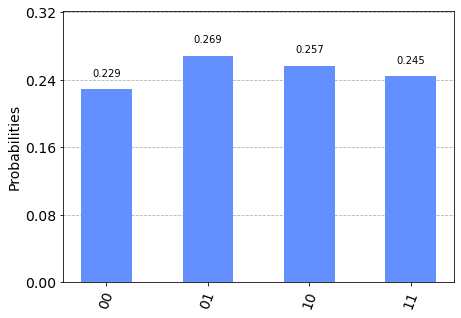

In [53]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)
